In [1]:
import numpy as np
import matplotlib.pyplot as plt
from metric_forest import MetricForest

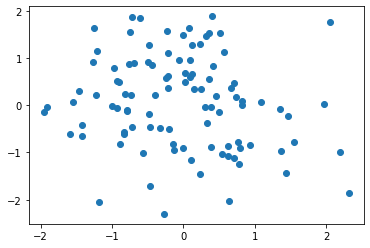

In [6]:
n_points = 100
np.random.seed(42)
points = np.random.randn(100, 5)
plt.scatter(points[:,0], points[:,1])

In [7]:
forest = MetricForest(0.5, points)

In [8]:
forest.forest

[MetricForest: root=[ 2.19045563 -0.99053633 -0.56629773  0.09965137 -0.50347565],
 MetricForest: root=[-0.73036663  0.21645859  0.04557184 -0.65160035  2.14394409],
 MetricForest: root=[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337],
 MetricForest: root=[ 1.35624003 -0.07201012  1.0035329   0.36163603 -0.64511975],
 MetricForest: root=[-0.0626791   0.95514232 -0.98572605  0.50404652 -0.53025762],
 MetricForest: root=[ 0.71161488 -1.12464209 -1.53411417  1.27767682  0.33231401]]

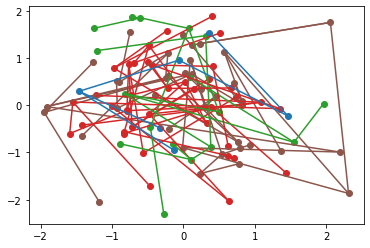

In [9]:
forest.plot()